In [205]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

linkname = 'bank-full.csv'
df = pd.read_csv(linkname, sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [206]:
df.shape

(45211, 17)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [208]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [209]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [210]:
#All categorical columns
cat_columns=list(df.select_dtypes(include=[object]).columns)
cat_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [211]:
#Unique values with respect to each categorical column
for i in df[cat_columns]:
    print(i+":",df[i].unique())

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


#### Cleaning the dataset

In [212]:
df.drop(df.index[(df["poutcome"] == "unknown")],axis=0,inplace=True)

In [213]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [214]:
df['poutcome'].unique()

array(['failure', 'other', 'success'], dtype=object)

In [215]:
df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

In [216]:
print(df['job'].unique())
print(df['education'].unique())

['admin.' 'services' 'management' 'technician' 'blue-collar' 'unemployed'
 'entrepreneur' 'housemaid' 'retired' 'self-employed' 'other' 'student']
['tertiary' 'secondary' 'primary' 'other']


In [217]:
df['poutcome'].value_counts()

failure    4901
other      1840
success    1511
Name: poutcome, dtype: int64

# Outliers

In [218]:
### checking for outliers in numerical columns
from scipy.stats import zscore
df[['balance']].mean()

balance    1557.323558
dtype: float64

In [219]:
df['outliers_balance'] = df['balance']
df['outliers_balance']= zscore(df['outliers_balance'])

In [220]:
cond1 = (df['outliers_balance']>3) | (df['outliers_balance']<-3 )
df = df.drop(df[cond1].index, axis = 0, inplace = False)

In [221]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outliers_balance
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no,-0.220611
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes,-0.589427
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes,0.616330
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no,0.280181
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes,-0.508738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no,-0.026893
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes,-0.318287
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes,0.422285
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1.358208


In [222]:
df.shape

(8110, 18)

In [223]:
df.drop("outliers_balance",axis=1,inplace=True)

In [224]:
### Rename output variable 'y' to 'output_variable'
df.rename(index=str, columns = {"y": "output_variable"},inplace = True)

In [225]:
df['output_variable'].value_counts()

no     6253
yes    1857
Name: output_variable, dtype: int64

In [226]:
# Let's check impact of each independent variable on output variable
#But when comparing, no/yes ratio has to be approximately 3 to 1, 
#if it more or less than the independent variable is impacting the output.
#Bin age variable
bins = [0, 25,50,100]
labels = [0,1,2]
df['binned_age'] = pd.cut(df['age'], bins=bins, labels=labels)
df[['binned_age','output_variable']].value_counts()
#age has an impact on output_variable 144/100<3

binned_age  output_variable
1           no                 4970
            yes                1267
2           no                 1139
            yes                 490
0           no                  144
            yes                 100
dtype: int64

In [227]:
### converting the output variable into binary numbers
df.drop(['binned_age'],inplace=True,axis=1)
df["output_variable"] = df["output_variable"].apply(lambda x: 0 if x == 'no' else 1)

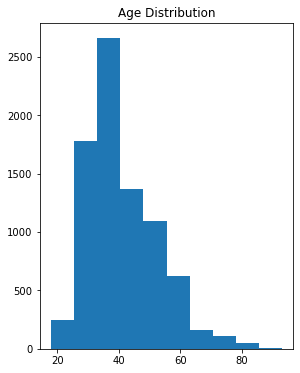

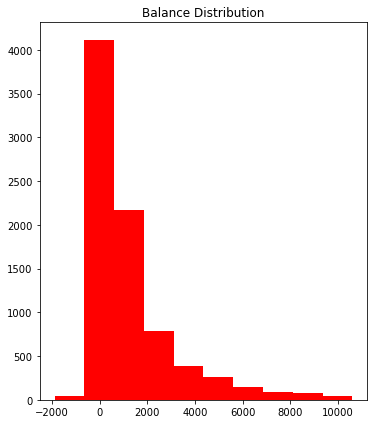

In [228]:
### EDA
### age and balance
ab1 = plt.figure(figsize = (10,6)).add_subplot(1,2,1) 
ab2 = plt.figure(figsize = (10,6)).add_subplot(1,2,2) 

ab1.hist(df['age'])
ab1.set_title('Age Distribution')

ab2.hist(df['balance'], color = 'red')
ab2.set_title('Balance Distribution')

plt.tight_layout() 
plt.show()

## majority customers age 27 to 50

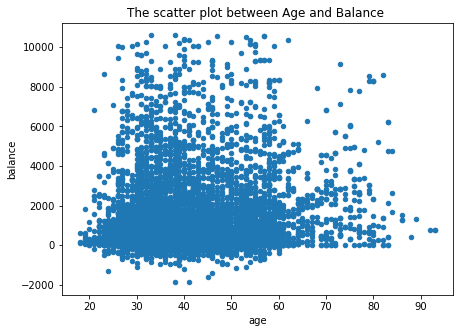

In [229]:
df.plot.scatter('age','balance',figsize = (7,5))

plt.title('The scatter plot between Age and Balance ')
plt.show()
# no clear relationship between them

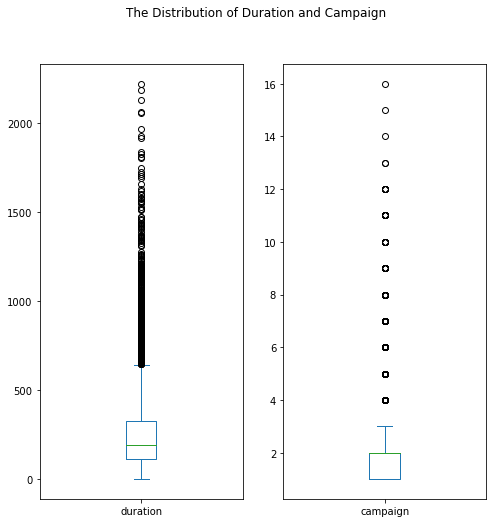

In [230]:
## duration vs campaign

dur_cam = df[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')

plt.show()

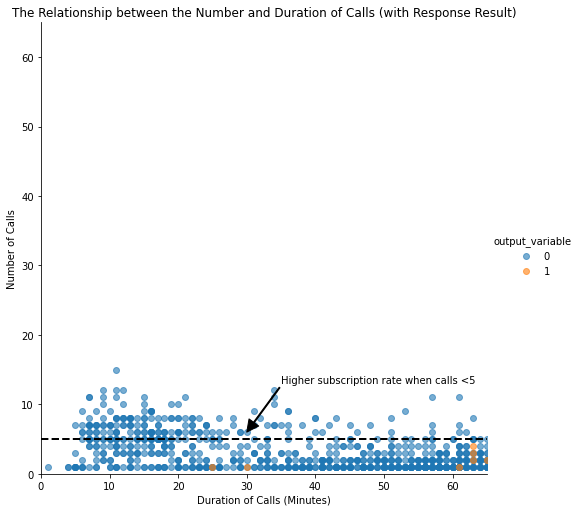

In [231]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = df,
                     hue = 'output_variable',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

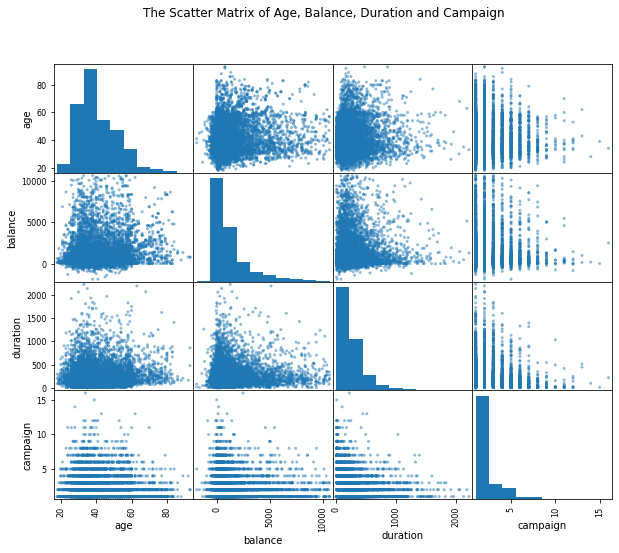

In [232]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(df[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

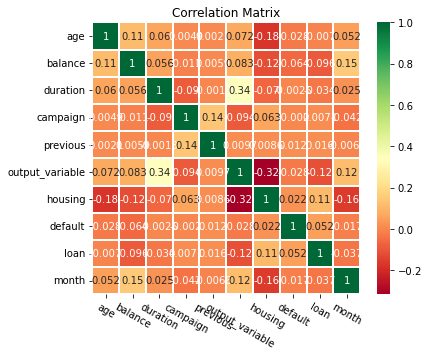

In [276]:
corr_data = df[['age','balance','duration','campaign','previous','output_variable']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [234]:
#Convert categorical values to numerical values
#We can't convert using label encoder because, we don't know order or prority of each value.
#So, we can convert using either by creating dummies or using onehotencoder
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['month']=df['month'].map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,
                            'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})

In [275]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'output_variable'],
      dtype='object')

In [309]:
# variable selection 
drop_cols=['job','marital','previous','default','day']
df2=df.drop(drop_cols,axis=1)
cat_columns=list(df2.select_dtypes(include=[object]).columns)

In [310]:
#All remaining categories
dum_df = pd.get_dummies(df2,columns=cat_columns, prefix=[column+'_type_' for column in cat_columns] )
dum_df

,age,balance,housing,loan,month,duration,campaign,pdays,output_variable,education_type__other,education_type__primary,education_type__secondary,education_type__tertiary,contact_type__cellular,contact_type__telephone,contact_type__unknown,poutcome_type__failure,poutcome_type__other,poutcome_type__success
24060,33,882,0,0,9,39,1,151,0,0,0,0,1,0,1,0,1,0,0
24062,42,-247,1,1,9,519,1,166,1,0,0,1,0,0,1,0,0,1,0
24064,33,3444,1,0,9,144,1,91,1,0,0,1,0,0,1,0,1,0,0
24072,36,2415,1,0,9,73,1,86,0,0,0,0,1,0,1,0,0,1,0
24077,36,0,1,0,9,140,1,143,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,1475,1,0,10,1166,3,530,0,0,0,1,0,1,0,0,0,1,0
45201,53,583,0,0,10,226,1,184,1,0,0,0,1,1,0,0,0,0,1
45204,73,2850,0,0,10,300,1,40,1,0,0,1,0,1,0,0,1,0,0
45208,72,5715,0,0,10,1127,5,184,1,0,0,1,0,1,0,0,0,0,1


In [311]:

# Features: first 20 columns
X = dum_df.drop(['output_variable'],axis=1)

# Target variable: 'response_binary'
Y = dum_df['output_variable']

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [313]:
# 20% of the data will be used for testing
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

In [314]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [315]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [316]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, shuffle=True)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.835239 (0.012528)
KNN: 0.777435 (0.014310)
CART: 0.799939 (0.022116)
NB: 0.817820 (0.011171)


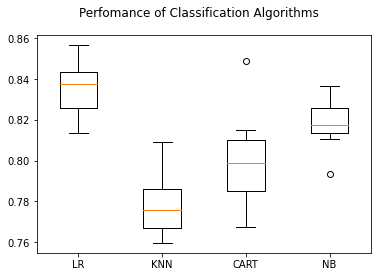

In [317]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

# Logistic Regression

In [318]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8304562268803946


# KNN

In [319]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
predictions1 = KNN.predict(X_test)
print(accuracy_score(Y_test, predictions1))

0.7768187422934648


# Decision Tree

In [320]:
CART = DecisionTreeClassifier()
CART.fit(X_train, Y_train)
predictions2 = CART.predict(X_test)
print(accuracy_score(Y_test, predictions2))

0.8076448828606658


# Navie Bayes

In [321]:
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions3 = NB.predict(X_test)
print(accuracy_score(Y_test, predictions3))

0.8045622688039458


[[1154  107]
 [ 168  193]]


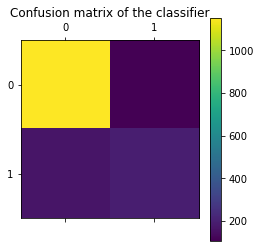

In [322]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [323]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1261
           1       0.64      0.53      0.58       361

    accuracy                           0.83      1622
   macro avg       0.76      0.72      0.74      1622
weighted avg       0.82      0.83      0.82      1622

